In [45]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model




ModuleNotFoundError: No module named 'statsmodels'

In [14]:
# Reading in data and dropping headings 

data_path  = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")
crimes = pd.read_csv(data_path, header=None)
crimes = crimes.drop([0,1,2,3])

In [15]:
#cleaning the data - will create functions next time 


# changing title of column
crimes['city'] = crimes[0]
crimes['population'] = crimes[1]
crimes['violent\ncrime'] = crimes[2]
crimes['Murder and\nnonnegligent\nmanslaughter'] = crimes[3]
crimes['Rape\n(revised\ndefinition)1'] = crimes[4]
crimes['Rape\n(legacy\ndefinition)2'] = crimes[5]
crimes['Robbery'] = crimes[6]
crimes['Aggravated\nassault'] = crimes[7]
crimes['Property\ncrime'] = crimes[8]
crimes['Burglary'] = crimes[9]
crimes['Larceny-\ntheft'] = crimes[10]
crimes['Motor\nvehicle\ntheft'] = crimes[11]
crimes['Arson3'] = crimes[12]
                        
crimes



,0,1,2,3,4,5,6,7,8,9,...,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
4,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,...,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
5,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,...,0,NaN,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,...,0,NaN,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,...,0,NaN,0,0,3,16,1,15,0,0
8,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,...,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
9,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,...,0,NaN,3,4,16,223,53,165,5,NaN
10,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,...,0,NaN,0,3,2,46,10,36,0,NaN
11,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,...,0,NaN,0,0,3,10,0,10,0,0
12,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,...,1,NaN,7,31,68,"2,118",204,"1,882",32,3
13,Amityville Village,"9,519",9,0,NaN,2,4,3,210,16,...,0,NaN,2,4,3,210,16,188,6,1


In [16]:
# Removing old col without labels 
crimes = crimes.drop(0,axis=1)
crimes = crimes.drop(1,axis=1)
crimes = crimes.drop(2,axis=1)
crimes = crimes.drop(3,axis=1)
crimes = crimes.drop(4,axis=1)
crimes = crimes.drop(5,axis=1)
crimes = crimes.drop(6,axis=1)
crimes = crimes.drop(7,axis=1)
crimes = crimes.drop(8,axis=1)
crimes = crimes.drop(9,axis=1)
crimes = crimes.drop(10,axis=1)
crimes = crimes.drop(11,axis=1)
crimes = crimes.drop(12,axis=1)
crimes = crimes.drop('Rape\n(revised\ndefinition)1',axis=1)

In [ ]:
crimes

In [17]:
crimes = crimes.drop([4])

In [18]:
#drop missing values 
crimes = crimes.dropna()
crimes

,city,population,violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
5,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
11,Allegany Village,"1,781",3,0,0,0,3,10,0,10,0,0
12,Amherst Town,"118,296",107,1,7,31,68,"2,118",204,"1,882",32,3
13,Amityville Village,"9,519",9,0,2,4,3,210,16,188,6,1
14,Amsterdam,"18,182",30,0,0,12,18,405,99,291,15,0
15,Arcade Village,"2,053",0,0,0,0,0,39,3,35,1,0
16,Ardsley Village,"4,523",5,0,0,3,2,33,4,28,1,0
17,Asharoken Village,658,0,0,0,0,0,2,0,2,0,0


In [19]:
# Data cleaning

#Remove commas from numbers, remove spaces before and after entries (if they exist)
for col in crimes.columns:
    crimes[col]= crimes[col].apply(lambda x: str(x).replace(',', ''))
    crimes[col]= crimes[col].apply(lambda x: str(x).strip())

#Convert str and objects to float 
numerical_crimes = crimes.columns[1:]
for num_col in numerical_crimes:
    crimes[num_col]= crimes[num_col].apply(lambda x: float(x))

In [20]:
#checkign the types of the columns to make sure they are ready for graphing 
crimes.dtypes


city                                       object
population                                float64
violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


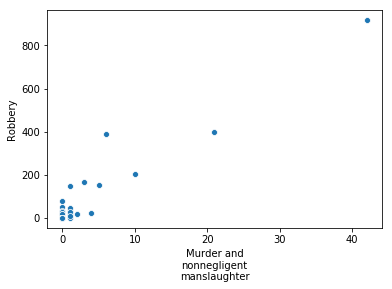

In [21]:
#Visualizing the ataset 
print(sns.scatterplot(x=crimes['Murder and\nnonnegligent\nmanslaughter'], y=crimes['Robbery']))


In [ ]:
print(sns.scatterplot(x=crimes['population'], y=crimes['violent\ncrime']))


In [ ]:
print(sns.scatterplot(x=crimes['Murder and\nnonnegligent\nmanslaughter'], y=crimes['population']))
# I will keep the outlying values because they correspond with population  

In [22]:

#Feature Engineering 
crimes['Robbery_conditon'] = crimes['Robbery'].apply(lambda x: 1 if x > 0 else 0)
crimes['Murder_condition'] = crimes['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 1 if x > 0 else 0)
crimes['pop_squared'] = crimes['population'] * crimes['population']
crimes['murder_condition_squared'] = crimes['Murder_condition']* crimes['Murder_condition']

crimes['nonviolentcrime'] = crimes['Larceny-\ntheft'] * crimes['Burglary']



#Additional features 

#crimes['Arson/robbery'] = int(crimes['Arson3'])/int(crimes['Robbery'])
#crimes['violentcrime/pop'] = int(crimes['violent crime'])/int(['populations'])
crimes['nonviolentcrime'] = crimes['Larceny-\ntheft'] * crimes['Burglary']
#featues for model 
crimes['murder_pop'] = crimes['Murder and\nnonnegligent\nmanslaughter']/crimes['population']
crimes['Robbery_pop'] = crimes['Robbery'] / crimes['population']
crimes['murder_robbery'] = crimes['Robbery']/crimes['Murder and\nnonnegligent\nmanslaughter']







In [ ]:
print(sns.scatterplot(x=crimes['murder_condition_squared'], y=crimes['population']))

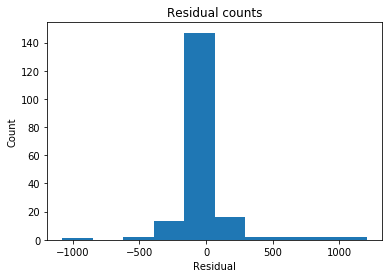

In [25]:
# checking residuals, somewhat normally distributed, slightly right skewed 

predicted = regr.predict(X).ravel()
actual = crimes['Property\ncrime']

# Calculating the residual 
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [ ]:
# Low correlation among features 
correlation_matrix = X.corr()
display(correlation_matrix)

In [38]:
from sklearn.metrics import mean_squared_error
# Fitting the model 
regr = linear_model.LinearRegression()
Y = crimes['Property\ncrime'].values.reshape(-1, 1)
X = crimes[['population','Robbery_conditon','Murder_condition', 'nonviolentcrime']]
regr.fit(X, Y)

# Cross validation with 10% holdout group 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=10)

print('With 10% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))

# Cross validating using 6 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, X, Y, cv=6))


#RSME 
modelPred = regr.predict(X)
#print(modelPred)

#print("Number of predictions:",len(modelPred))

meanSquaredError = mean_squared_error(Y, modelPred)

rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

# Model results 
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

With 10% Holdout: 0.8352514888709313
Testing on Sample: 0.9484235548380356
[0.96478874 0.70460562 0.73939431 0.7240034  0.84354799 0.89142273]
RMSE: 218.61034358268563

Coefficients: 
 [[1.42060500e-02 1.05248492e+02 2.06824503e+02 4.14036645e-04]]

Intercept: 
 [-17.86891835]

R-squared:
0.9484235548380356


In [3]:
crimes2014 = pd.read_csv('2014nycrimes.csv')
crimes2014 = crimes2014.drop([0,1,2])
crimes2014               

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,City,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape\r(revised\rdefinition)1,Rape\r(legacy\rdefinition)2,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Arson3,NaN
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0,NaN
5,Addison Town and Village,"2,568",2,0,NaN,0,1,1,49,1,47,1,0,NaN
6,Afton Village4,820,0,0,0,NaN,0,0,1,0,1,0,0,NaN
7,Akron Village,"2,842",1,0,NaN,0,0,1,17,0,17,0,0,NaN
8,Albany4,"98,595",802,8,54,NaN,237,503,"3,888",683,"3,083",122,12,NaN
9,Albion Village4,"5,872",26,0,3,NaN,2,21,204,41,159,4,0,NaN
10,Alexandria Bay Village4,"1,107",0,0,0,NaN,0,0,7,2,5,0,0,NaN
11,Alfred Village4,"4,032",11,1,1,NaN,0,9,30,6,24,0,0,NaN
12,Altamont Village4,"1,723",1,0,0,NaN,0,1,2,2,0,0,0,NaN


In [4]:
crimes2014['city'] = crimes2014['Table 8']
crimes2014['population'] = crimes2014['Unnamed: 1']
crimes2014['violent\ncrime'] = crimes2014['Unnamed: 2']
crimes2014['Murder and\nnonnegligent\nmanslaughter'] = crimes2014['Unnamed: 3']
crimes2014['Rape\n(revised\ndefinition)1'] = crimes2014['Unnamed: 4']
crimes2014['Rape2'] = crimes2014['Unnamed: 5']
crimes2014['Robbery'] = crimes2014['Unnamed: 6']
crimes2014['Aggravated\nassault'] = crimes2014['Unnamed: 7']
crimes2014['Property\ncrime'] = crimes2014['Unnamed: 8']
crimes2014['Burglary'] = crimes2014['Unnamed: 9']
crimes2014['Larceny-\ntheft'] = crimes2014['Unnamed: 10']
crimes2014['Motor\nvehicle\ntheft'] = crimes2014['Unnamed: 11']
crimes2014['Arson3'] = crimes2014['Unnamed: 12']

crimes2014


,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
3,City,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape\r(revised\rdefinition)1,Rape\r(legacy\rdefinition)2,Robbery,Aggravated\rassault,Property\rcrime,Burglary,...,Murder and\rnonnegligent\rmanslaughter,Rape\r(revised\rdefinition)1,Rape\r(legacy\rdefinition)2,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Arson3
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,...,0,NaN,0,0,0,11,1,10,0,0
5,Addison Town and Village,"2,568",2,0,NaN,0,1,1,49,1,...,0,NaN,0,1,1,49,1,47,1,0
6,Afton Village4,820,0,0,0,NaN,0,0,1,0,...,0,0,NaN,0,0,1,0,1,0,0
7,Akron Village,"2,842",1,0,NaN,0,0,1,17,0,...,0,NaN,0,0,1,17,0,17,0,0
8,Albany4,"98,595",802,8,54,NaN,237,503,"3,888",683,...,8,54,NaN,237,503,"3,888",683,"3,083",122,12
9,Albion Village4,"5,872",26,0,3,NaN,2,21,204,41,...,0,3,NaN,2,21,204,41,159,4,0
10,Alexandria Bay Village4,"1,107",0,0,0,NaN,0,0,7,2,...,0,0,NaN,0,0,7,2,5,0,0
11,Alfred Village4,"4,032",11,1,1,NaN,0,9,30,6,...,1,1,NaN,0,9,30,6,24,0,0
12,Altamont Village4,"1,723",1,0,0,NaN,0,1,2,2,...,0,0,NaN,0,1,2,2,0,0,0


In [5]:
crimes2014 = crimes2014.drop('Table 8', axis=1)
crimes2014 = crimes2014.drop('Unnamed: 1' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 2' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 3' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 4' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 5' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 6' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 7' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 8' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 9' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 10' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 11' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 12' ,axis=1)
crimes2014 = crimes2014.drop('Unnamed: 13' ,axis=1)
crimes2014 = crimes2014.drop('Rape2',axis=1)


In [6]:
crimes2014

,city,population,violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
3,City,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape\r(revised\rdefinition)1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Arson3
4,Adams Village,"1,851",0,0,NaN,0,0,11,1,10,0,0
5,Addison Town and Village,"2,568",2,0,NaN,1,1,49,1,47,1,0
6,Afton Village4,820,0,0,0,0,0,1,0,1,0,0
7,Akron Village,"2,842",1,0,NaN,0,1,17,0,17,0,0
8,Albany4,"98,595",802,8,54,237,503,"3,888",683,"3,083",122,12
9,Albion Village4,"5,872",26,0,3,2,21,204,41,159,4,0
10,Alexandria Bay Village4,"1,107",0,0,0,0,0,7,2,5,0,0
11,Alfred Village4,"4,032",11,1,1,0,9,30,6,24,0,0
12,Altamont Village4,"1,723",1,0,0,0,1,2,2,0,0,0


In [7]:
crimes2014 = crimes2014.drop([3])
#crimes2014 = crimes2014.dropna()

In [8]:
crimes2014

,city,population,violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
4,Adams Village,"1,851",0,0,NaN,0,0,11,1,10,0,0
5,Addison Town and Village,"2,568",2,0,NaN,1,1,49,1,47,1,0
6,Afton Village4,820,0,0,0,0,0,1,0,1,0,0
7,Akron Village,"2,842",1,0,NaN,0,1,17,0,17,0,0
8,Albany4,"98,595",802,8,54,237,503,"3,888",683,"3,083",122,12
9,Albion Village4,"5,872",26,0,3,2,21,204,41,159,4,0
10,Alexandria Bay Village4,"1,107",0,0,0,0,0,7,2,5,0,0
11,Alfred Village4,"4,032",11,1,1,0,9,30,6,24,0,0
12,Altamont Village4,"1,723",1,0,0,0,1,2,2,0,0,0
13,Amherst Town4,"118,860",128,1,16,43,68,"2,066",176,"1,846",44,2


In [36]:
crimes2014 = crimes2014.dropna()

In [10]:
crimes2014

,city,population,violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
6,Afton Village4,820,0,0,0,0,0,1,0,1,0,0
8,Albany4,"98,595",802,8,54,237,503,"3,888",683,"3,083",122,12
9,Albion Village4,"5,872",26,0,3,2,21,204,41,159,4,0
10,Alexandria Bay Village4,"1,107",0,0,0,0,0,7,2,5,0,0
11,Alfred Village4,"4,032",11,1,1,0,9,30,6,24,0,0
12,Altamont Village4,"1,723",1,0,0,0,1,2,2,0,0,0
13,Amherst Town4,"118,860",128,1,16,43,68,"2,066",176,"1,846",44,2
14,Amity Town and Belmont Village4,"2,250",0,0,0,0,0,0,0,0,0,0
17,Angelica Village4,846,1,0,0,0,1,6,4,2,0,0
22,Avon Village4,"3,333",2,0,0,1,1,14,1,11,2,0


In [11]:
# Data cleaning

#Remove commas from numbers, remove spaces before and after entries (if they exist)
for col in crimes2014.columns:
    crimes2014[col]= crimes2014[col].apply(lambda x: str(x).replace(',', ''))
    crimes2014[col]= crimes2014[col].apply(lambda x: str(x).strip())

#Convert str and objects to float 
numerical_crimes = crimes2014.columns[1:]
for num_col in numerical_crimes:
    crimes2014[num_col]= crimes2014[num_col].apply(lambda x: float(x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [13]:
crimes2014.dtypes


city                                       object
population                                float64
violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
dtype: object

In [29]:
#Feature Engineering 
crimes2014['Robbery_conditon'] = crimes2014['Robbery'].apply(lambda x: 1 if x > 0 else 0)
crimes2014['Murder_condition'] = crimes2014['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 1 if x > 0 else 0)
crimes2014['pop_squared'] = crimes2014['population'] * crimes2014['population']
crimes2014['murder_condition_squared'] = crimes2014['Murder_condition']* crimes2014['Murder_condition']
crimes2014['nonviolentcrime'] = (crimes2014['Larceny-\ntheft'] * crimes['Burglary'])/2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [43]:
from sklearn.metrics import mean_squared_error
# Fitting the model 
regr2014 = linear_model.LinearRegression()
Y = crimes2014['Property\ncrime'].values.reshape(-1, 1)
X = crimes2014[['population','Robbery_conditon','Murder_condition', 'nonviolentcrime']]
regr2014.fit(X, Y)

# Cross validation with 10% holdout group 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=10)

print('With 40% Holdout: ' + str(regr2014.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr2014.fit(X, Y).score(X, Y)))

# Cross validating using 6 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr2014, X, Y, cv=6))


#RSME 
modelPred = regr2014.predict(X)
#print(modelPred)

#print("Number of predictions:",len(modelPred))

meanSquaredError = mean_squared_error(Y, modelPred)

rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

# Model results, worse than 2013 crime data
print('\nCoefficients: \n', regr2014.coef_)
print('\nIntercept: \n', regr2014.intercept_)
print('\nR-squared:')
print(regr2014.score(X, Y))

With 40% Holdout: 0.6393000423622555
Testing on Sample: 0.7462877304636417
[ 0.81576344  0.90709951  0.84454557 -1.02442724  0.52735202  0.66514433]
RMSE: 288.73699719104985

Coefficients: 
 [[1.65622020e-02 1.10679411e+02 4.25373830e+02 3.00803391e-03]]

Intercept: 
 [-62.62136256]

R-squared:
0.7462877304636417
